In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

sns.set()

batch_size = 128
num_classes = 10
epochs = 2

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_hats = np.load('y_hats.npy')

maxes = y_hats.argmax(axis=2)
# this is the standard deviation of each committee prediction
y_stds = maxes.std(axis=0)
n = y_test.shape[0]

y_hatz = []
error_vals = []
for i in range(10000):
    y_hatz.append(np.bincount(maxes[:, i]).argmax())
    if y_hatz[i] != y_test[i]:
        error_vals.append(i)
y_hatz = np.array(y_hatz)

y_diff = y_hatz - y_test

predictions = np.zeros(y_test.size, dtype=np.int)
predictions[y_diff == 0] = 1
# 0 for incorrect
# 1 for correct
err_num = predictions.size - predictions.sum()
score = predictions.sum() / predictions.size
print(score)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
0.9931


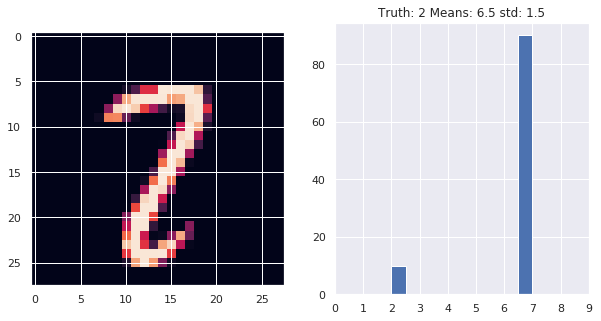

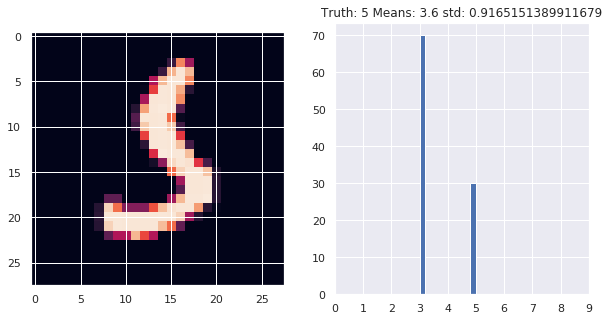

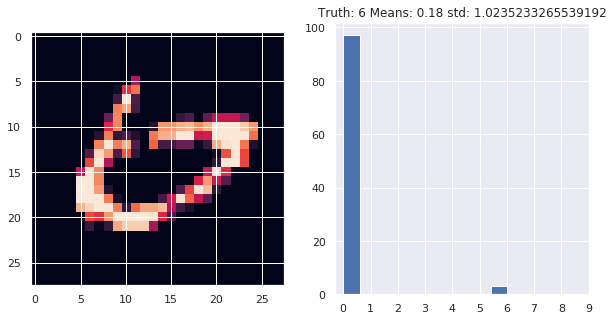

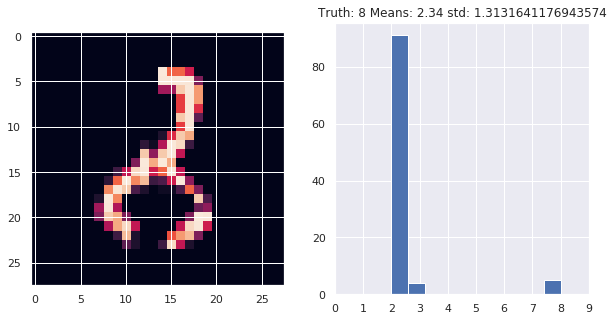

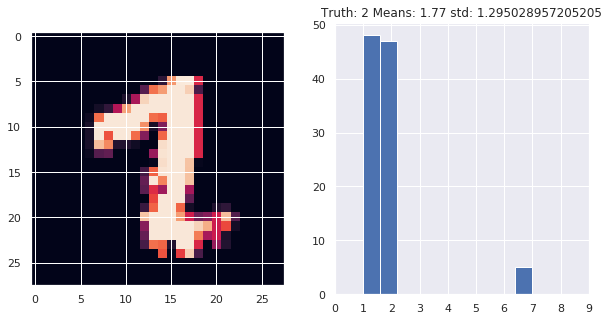

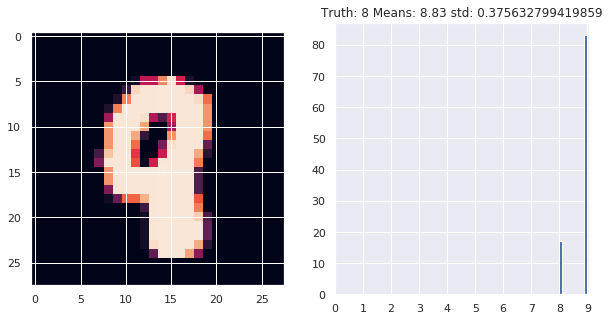

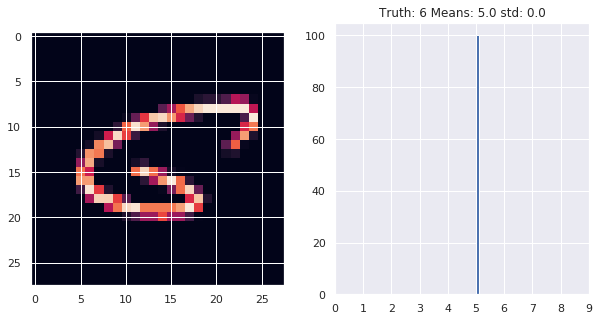

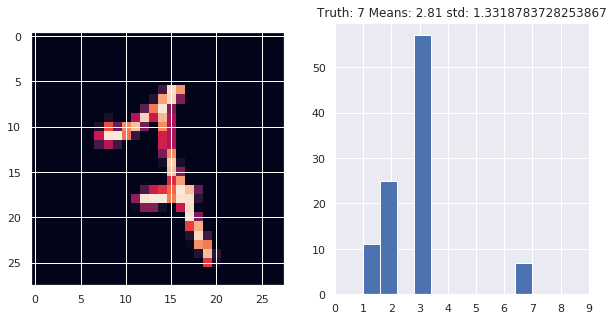

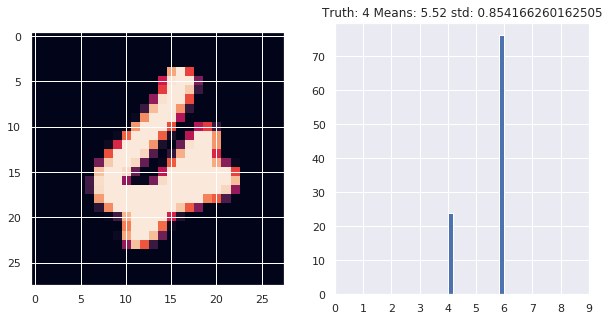

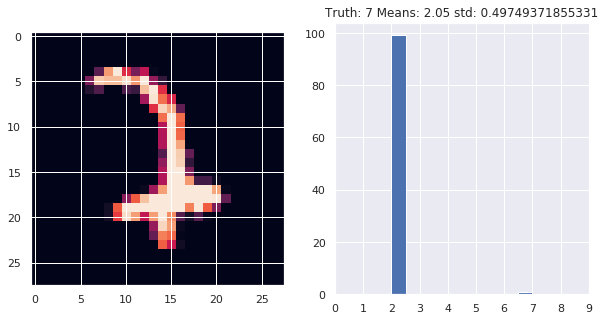

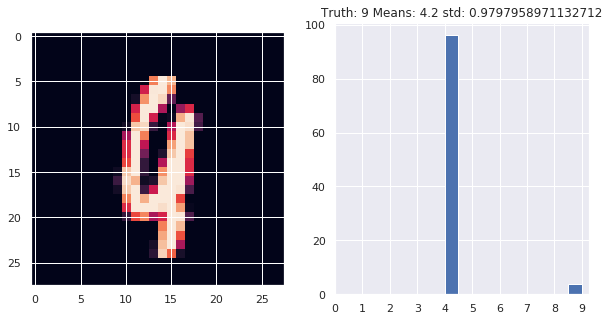

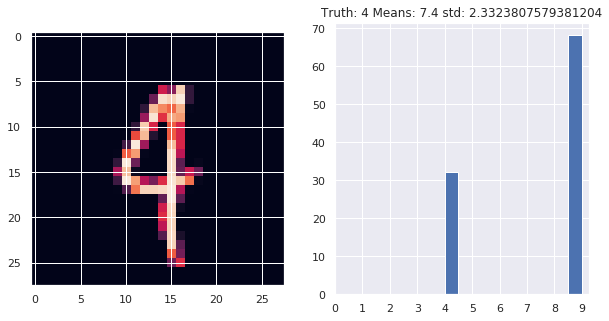

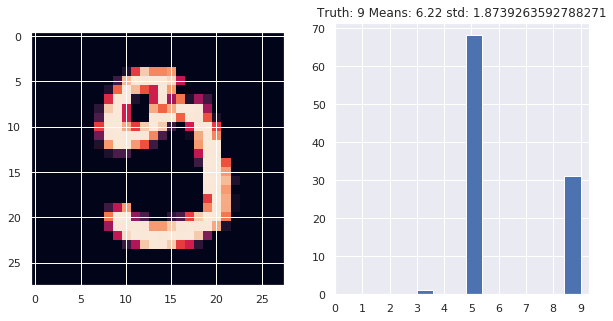

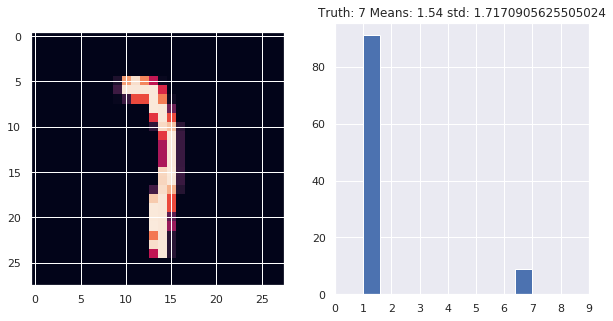

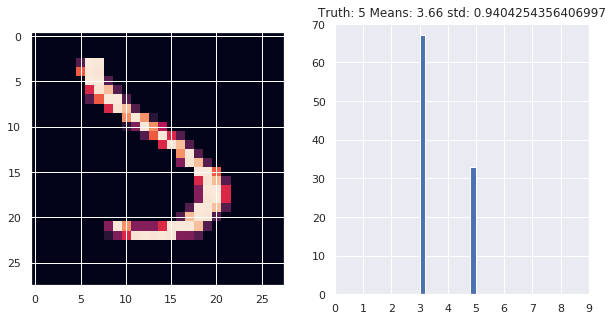

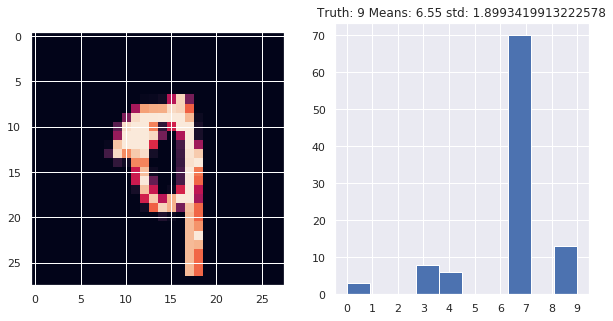

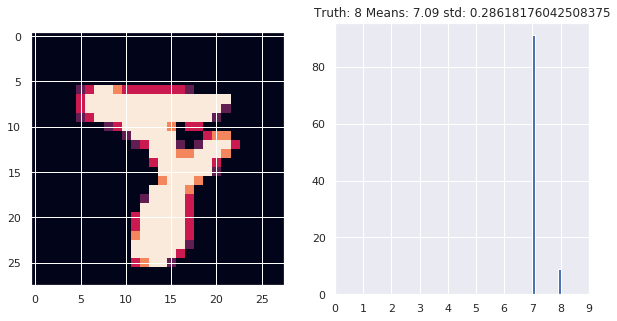

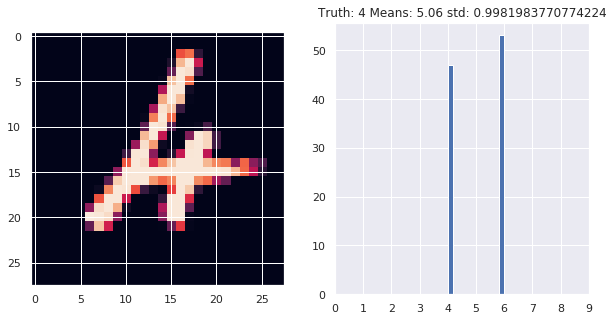

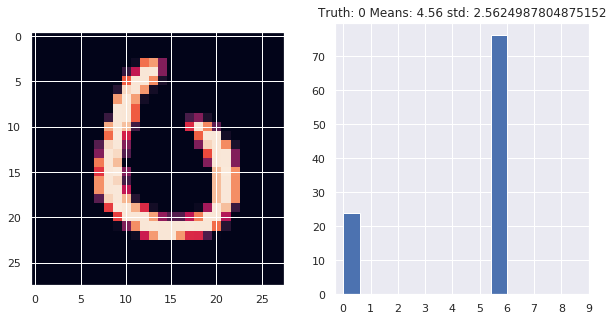

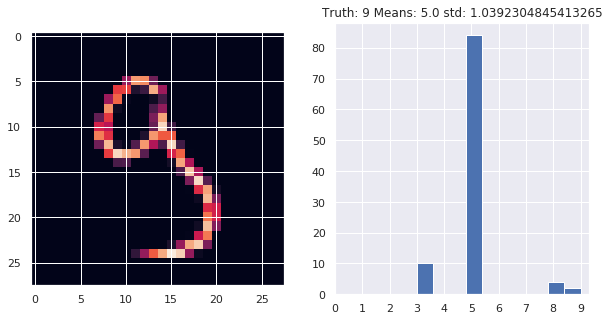

In [2]:
%matplotlib inline
# plot 20 examples of error images
for i in range(20):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    plt.title('Truth: ' + str(y_test[error_vals[i]]) + ' Means: ' + str(maxes[:, error_vals[i]].mean())  + ' std: ' + str(maxes[:, error_vals[i]].std()) )
    axes[0].imshow(x_test[error_vals[i], :, :, 0])
    axes[1].hist(maxes[:, error_vals[i]])
    axes[1].set_xticks(np.arange(0, 10))
plt.show()
# examples of 20 different incorrect predictions

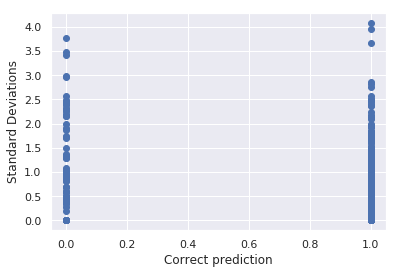

In [3]:
plt.figure()
plt.plot(predictions, y_stds, 'o')
plt.xlabel('Correct prediction')
plt.ylabel('Standard Deviations')
plt.show()
# 0 for incorrect
# 1 for correct

/usr/lib64/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


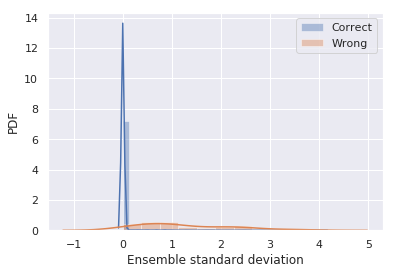

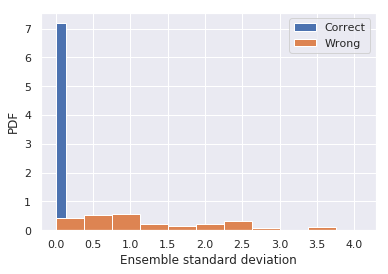

In [4]:
ind_loc_correct = predictions == 1
ind_loc_incorrect = predictions == 0
plt.figure()
sns.distplot(y_stds[ind_loc_correct], label='Correct', bins=30, norm_hist=True)
sns.distplot(y_stds[ind_loc_incorrect], label='Wrong', bins=10, norm_hist=True)
plt.xlabel('Ensemble standard deviation')
plt.ylabel('PDF')
plt.legend()
plt.figure()
plt.hist(y_stds[ind_loc_correct], label='Correct', bins=30, normed=True)
plt.hist(y_stds[ind_loc_incorrect], label='Wrong', bins=10, normed=True)
plt.xlabel('Ensemble standard deviation')
plt.ylabel('PDF')
plt.legend()
plt.show()
